# Apartment Real estate analysis
This dataset is extracted from prominent real estate portals . The targeted housing market for this
project is Dubai, United Arab Emirates. Predict the price of an apartment from the following
attributes:
- id-property id
- neighborhood-neighborhood name
- latitude-location data
- longitude-location data
- price-market price
- size_in_sqft-covered area of apartment
- price_per_sqft-price per square feet for the apartment
- no_of_bedrooms-number of bedrooms in apartment
- no_of_bathrooms-number of bathrooms in apartment
- quality-quality based on number of amenities. Contains category labels Ultra, High, Medium, and Low

The rest of the attributes are either True or False
- maid_room
- unfurnished
- balcony
- barbecue_area
- built_in_wardrobes
- central_ac
- childrens_play_area
- childrens_pool
- concierge
- covered_parking
- kitchen_appliances
- lobby_in_building
- maid_service
- networked
- pets_allowed
- private_garden
- private_gym
- private_jacuzzi
- private_pool
- security
- shared_gym
- shared_pool
- shared_spa
- study
- vastu_compliant
- view_of_landmark
- view_of_water
- walk_in_closet

### Objective
Predict the apartment price using numerical data.
Guidelines
1. Explore and prepare the data.
2. Create training and testing data for the model
3. Train and test the model using any three regression algorithms or more and compare rmse error.
4. Show or visualize the output.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']= (10,5)

In [3]:
df=pd.read_csv('properties_data.csv')

In [4]:
df.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [5]:
df.columns

Index(['id', 'neighborhood', 'latitude', 'longitude', 'price', 'size_in_sqft',
       'price_per_sqft', 'no_of_bedrooms', 'no_of_bathrooms', 'quality',
       'maid_room', 'unfurnished', 'balcony', 'barbecue_area',
       'built_in_wardrobes', 'central_ac', 'childrens_play_area',
       'childrens_pool', 'concierge', 'covered_parking', 'kitchen_appliances',
       'lobby_in_building', 'maid_service', 'networked', 'pets_allowed',
       'private_garden', 'private_gym', 'private_jacuzzi', 'private_pool',
       'security', 'shared_gym', 'shared_pool', 'shared_spa', 'study',
       'vastu_compliant', 'view_of_landmark', 'view_of_water',
       'walk_in_closet'],
      dtype='object')

In [6]:
# Dropping unnecessary columns and keeping only relevent columns for price affecting the price.
df1=df.drop(['id','maid_room', 'unfurnished', 'balcony', 'barbecue_area',
       'built_in_wardrobes', 'central_ac', 'childrens_play_area',
       'childrens_pool', 'concierge', 'covered_parking', 'kitchen_appliances',
       'lobby_in_building', 'maid_service', 'networked', 'pets_allowed',
       'private_garden', 'private_gym', 'private_jacuzzi', 'private_pool',
       'security', 'shared_gym', 'shared_pool', 'shared_spa', 'study',
       'vastu_compliant', 'view_of_landmark', 'view_of_water',
       'walk_in_closet'], axis=1)

In [7]:
df1.head()

,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality
0,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium
1,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium
2,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium
3,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low
4,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   neighborhood     1905 non-null   object 
 1   latitude         1905 non-null   float64
 2   longitude        1905 non-null   float64
 3   price            1905 non-null   int64  
 4   size_in_sqft     1905 non-null   int64  
 5   price_per_sqft   1905 non-null   float64
 6   no_of_bedrooms   1905 non-null   int64  
 7   no_of_bathrooms  1905 non-null   int64  
 8   quality          1905 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 134.1+ KB


In [9]:
df1.shape

(1905, 9)

In [10]:
df1.describe()

,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms
count,1905.000000,1905.000000,1.905000e+03,1905.000000,1905.000000,1905.000000,1905.000000
mean,25.116538,55.212338,2.085830e+06,1417.050394,1327.243785,1.793176,2.512861
std,0.062647,0.068794,2.913200e+06,891.487639,668.473559,0.949489,1.063117
min,24.865992,55.069311,2.200000e+05,294.000000,361.870000,0.000000,1.000000
25%,25.072791,55.145389,8.900000e+05,840.000000,870.920000,1.000000,2.000000
50%,25.096700,55.207506,1.400000e+06,1271.000000,1169.590000,2.000000,2.000000
75%,25.188130,55.271797,2.200000e+06,1703.000000,1622.500000,2.000000,3.000000
max,25.273623,55.441623,3.500000e+07,9576.000000,4805.870000,5.000000,6.000000


<AxesSubplot:>

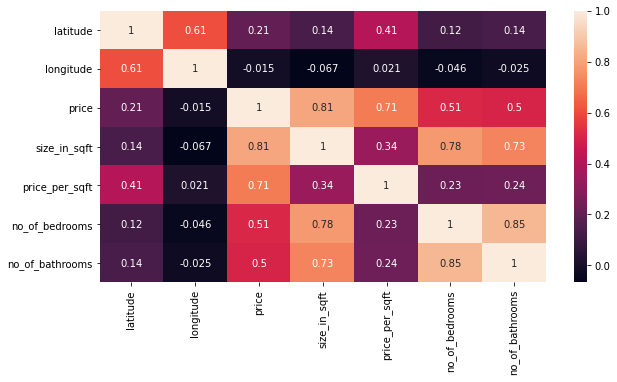

In [11]:
sns.heatmap(df1.corr(), annot=True)

- size_in_sqft & price_per_sqft are highly correlated to price.

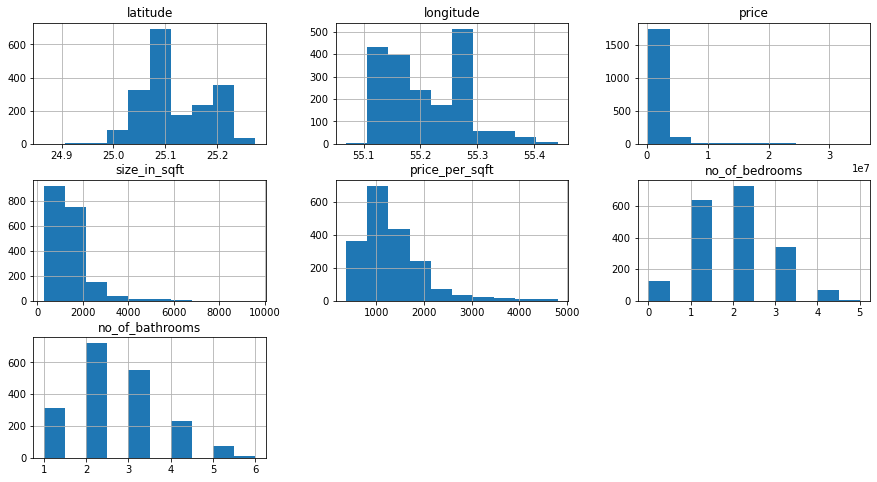

In [12]:
matplotlib.rcParams['figure.figsize']= (15,8)
df1.hist()
plt.show()

<AxesSubplot:xlabel='size_in_sqft', ylabel='price'>

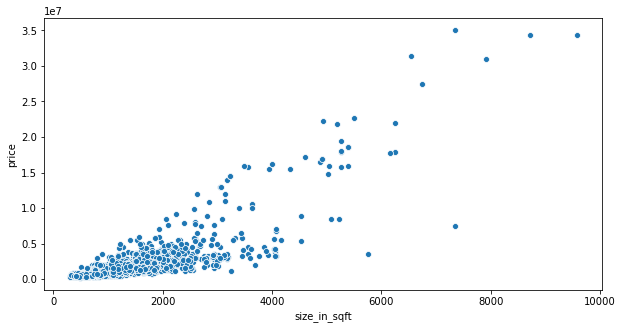

In [13]:
matplotlib.rcParams['figure.figsize']= (10,5)
sns.scatterplot(y='price', x='size_in_sqft', data=df1)

- Sactter plot shows positive correlation between price and size_in_sqft

<AxesSubplot:xlabel='no_of_bedrooms', ylabel='count'>

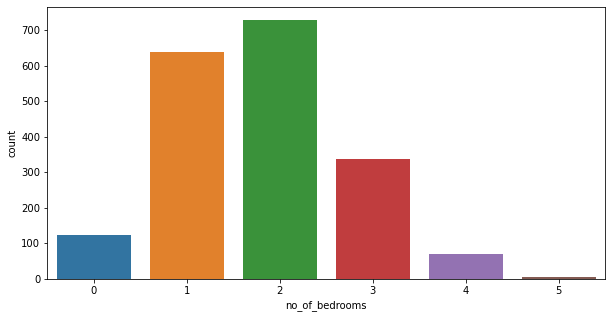

In [14]:
sns.countplot('no_of_bedrooms', data=df1)

- Count of flats with 1 & 2 number of bedrooms are higher than that of 3,4 & 5 number of bedrooms flat.

<AxesSubplot:xlabel='no_of_bedrooms', ylabel='price'>

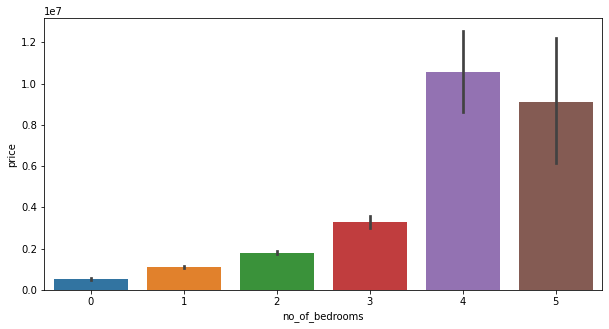

In [15]:
sns.barplot(y='price', x='no_of_bedrooms', data=df1)

- Number of bedrooms have positive correlation with price.

<AxesSubplot:xlabel='no_of_bathrooms', ylabel='count'>

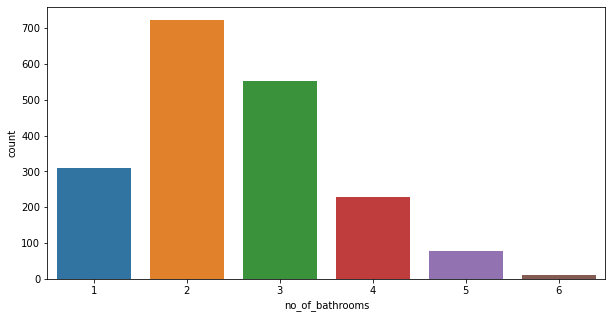

In [16]:
sns.countplot('no_of_bathrooms', data=df1)

<AxesSubplot:xlabel='no_of_bathrooms', ylabel='price'>

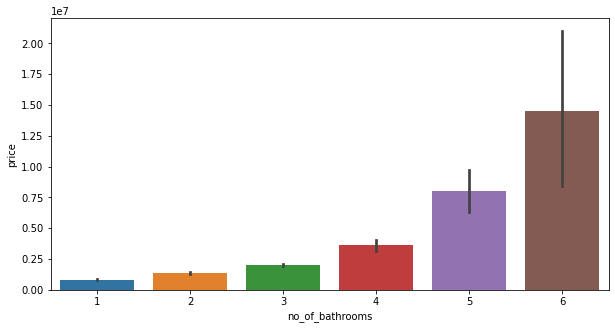

In [17]:
sns.barplot(y='price', x='no_of_bathrooms', data=df1)

In [18]:
df1.neighborhood .unique()

array(['Palm Jumeirah', 'Jumeirah Lake Towers', 'Culture Village',
       'Downtown Dubai', 'Dubai Marina', 'Business Bay', 'Old Town',
       'Al Kifaf', 'Meydan', 'Arjan', 'Jumeirah Beach Residence',
       'Dubai Creek Harbour (The Lagoons)', 'Greens', 'City Walk',
       'Al Furjan', 'DAMAC Hills', 'Jumeirah Golf Estates', 'Jumeirah',
       'Dubai Hills Estate', 'Umm Suqeim', 'Motor City', 'DIFC',
       'Jumeirah Village Circle', 'Barsha Heights (Tecom)', 'Al Barari',
       'Dubai Production City (IMPZ)', 'The Hills', 'The Views',
       'Dubai Sports City', 'Dubai Silicon Oasis',
       'Jumeirah Village Triangle', 'Mohammed Bin Rashid City',
       'Dubai Harbour', 'Bluewaters', 'International City',
       'Falcon City of Wonders', 'Mina Rashid', 'Town Square',
       'Green Community', 'Al Barsha', 'Al Sufouh', 'Dubai Festival City',
       'Jebel Ali', 'Dubai Land', 'World Trade Center', 'Mudon',
       'Discovery Gardens', 'Remraam', 'Mirdif',
       'Dubai South (Dubai Wo

<AxesSubplot:xlabel='price'>

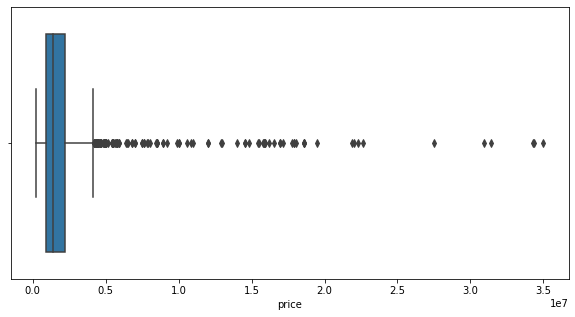

In [19]:
sns.boxplot('price', data=df1)

- Most of the flats price rangesr between 2-5 Million

In [20]:
df1.head(2)

,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality
0,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium
1,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium


<AxesSubplot:xlabel='quality', ylabel='count'>

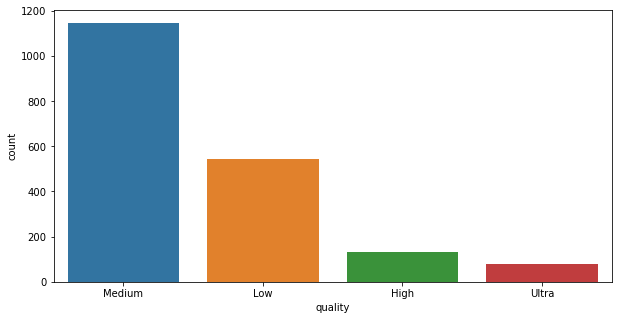

In [21]:
sns.countplot('quality', data=df1)

<AxesSubplot:xlabel='quality', ylabel='price'>

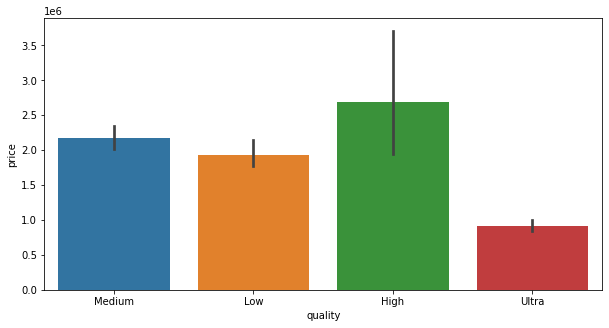

In [22]:
sns.barplot(y='price', x='quality', data=df1)

In [23]:
quality = pd.get_dummies(df.quality)

In [24]:
df1 = pd.concat([df1,quality],axis='columns')

In [25]:
df1.head(2)

,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,High,Low,Medium,Ultra
0,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,0,0,1,0
1,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,0,0,1,0


In [26]:
df1 = df.drop(['quality','neighborhood'],axis = 1)

In [27]:
df1.head(2)

,id,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,unfurnished,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,25.113208,55.138932,2700000,1079,2502.32,1,2,False,False,...,False,False,True,False,False,False,False,False,True,False
1,6008529,25.106809,55.151201,2850000,1582,1801.52,2,2,False,False,...,False,False,True,True,False,False,False,False,True,False


In [28]:
x=df1.drop("price",axis=1)
y=df1["price"]

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=51)

In [35]:
# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

In [36]:
#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

In [37]:
# Collect all RMSE Scores.
RMSE = []
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Decesion Tree Regression' , 'RandomForest Regression']

In [38]:
linreg = LinearRegression()
linreg.fit(x_train , y_train)
y_pred = linreg.predict(x_test)
linreg_score= linreg.score(x_test, y_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('Score    : %0.2f '%linreg_score)
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

RMSE.append(rmse)

Score    : 0.91 
MSE    : 602814548140.98 
MAE    : 556727.26 
RMSE   : 776411.33 
R2     : 0.91 


## 2) Lasso Regression

In [39]:
lassor_reg = Lasso(normalize=True)
lassor_reg.fit(x_train , y_train)
y_pred = lassor_reg.predict(x_test)
lassor_reg_score= lassor_reg.score(x_test, y_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('Score    : %0.2f '%linreg_score)
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

RMSE.append(rmse)

Score    : 0.91 
MSE    : 602748076298.50 
MAE    : 556670.95 
RMSE   : 776368.52 
R2     : 0.91 


## 3) AdaBoost Regression

In [40]:
ab_reg = AdaBoostRegressor(n_estimators=1000)
ab_reg.fit(x_train , y_train)
y_pred = ab_reg.predict(x_test)
ab_reg_score= lassor_reg.score(x_test, y_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('Score    : %0.2f '%linreg_score)
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

RMSE.append(rmse)

Score    : 0.91 
MSE    : 1362527448528.95 
MAE    : 1033580.74 
RMSE   : 1167273.51 
R2     : 0.80 


## 4) Decision Tree Regressor

In [41]:
dt_reg= DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)
y_pred = dt_reg.predict(x_test)
dt_reg_score= dt_reg.score(x_test, y_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('Score    : %0.2f '%linreg_score)
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

RMSE.append(rmse)

Score    : 0.91 
MSE    : 135361487983.83 
MAE    : 137951.08 
RMSE   : 367915.06 
R2     : 0.98 


## 5) Random Forest Regressor

In [42]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train , y_train)
y_pred = rf_reg.predict(x_test)
rf_reg_score= rf_reg.score(x_test, y_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('Score    : %0.2f '%linreg_score)
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

RMSE.append(rmse)

Score    : 0.91 
MSE    : 50304742142.25 
MAE    : 74250.51 
RMSE   : 224287.19 
R2     : 0.99 


In [43]:
compare = pd.DataFrame({'Algorithms' : models , 'RMSE' : RMSE})
compare.sort_values(by='RMSE' ,ascending=False)

,Algorithms,RMSE
2,AdaBoost Regression,1.167274e+06
0,Linear Regression,7.764113e+05
1,Lasso Regression,7.763685e+05
3,Decesion Tree Regression,3.679151e+05
4,RandomForest Regression,2.242872e+05


<AxesSubplot:xlabel='RMSE', ylabel='Algorithms'>

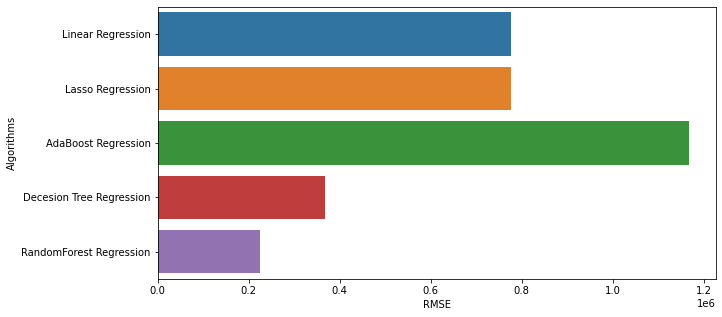

In [44]:
sns.barplot(x='RMSE' , y='Algorithms' , data=compare)

C:\Users\SUFI\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\SUFI\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


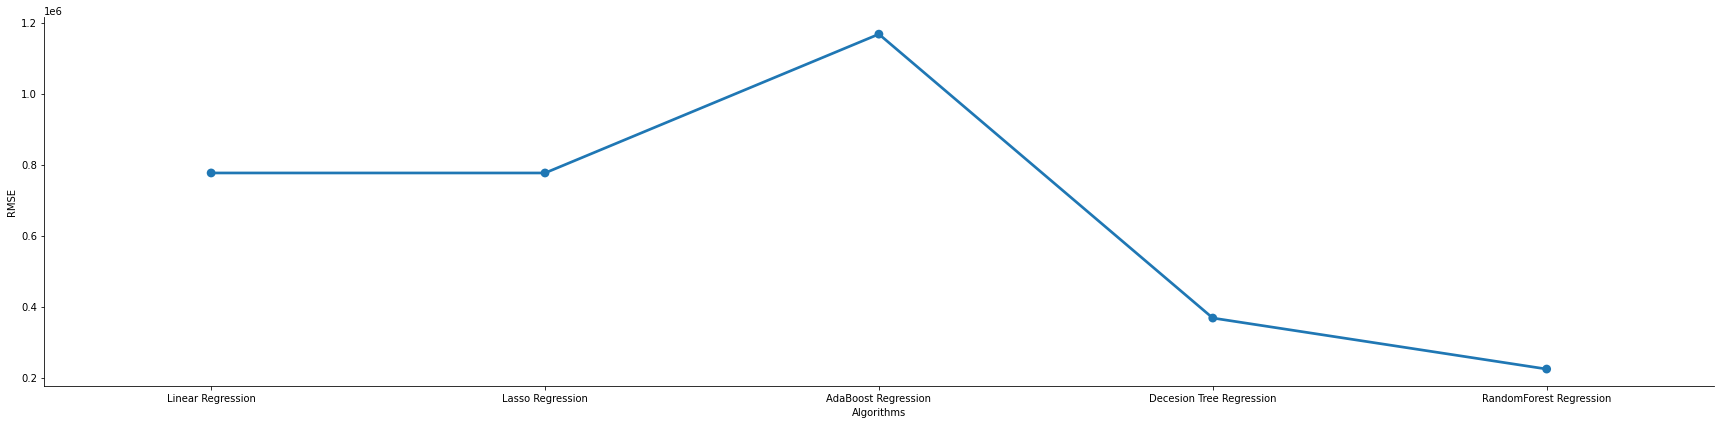

In [45]:
sns.factorplot(x='Algorithms', y='RMSE' , data=compare, size=6 , aspect=4)